# Online Shoppers Intention

### Kelompok 6
- Lintang Wisesa Atissalam (2206119256)
- Putu Raditya Astika Putra (2206020015)

<hr>

#### 1. Import packages

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, balanced_accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

<hr>

#### 2. Data Exploration

In [24]:
shop = pd.read_csv("online_shoppers_intention.csv")
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [25]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [26]:
# dataframe general info function
def report(df):
    col, d_type, uniques, n_uniques, is_null = [], [], [], [], []

    for i in df.columns:
        col.append(i)
        d_type.append(df[i].dtypes)
        uniques.append(df[i].unique())
        n_uniques.append(df[i].nunique())
        is_null.append(df[i].isnull().sum())

    return pd.DataFrame(
        {'Column': col, 'Type': d_type, 'Unique': uniques, 'n Unique': n_uniques, 'Null': is_null}
    )

report(shop)

,Column,Type,Unique,n Unique,Null
0,Administrative,int64,"[0, 1, 2, 4, 12, 3, 10, 6, 5, 9, 8, 16, 13, 11...",27,0
1,Administrative_Duration,float64,"[0.0, 53.0, 64.6, 6.0, 18.0, 9.0, 56.0, 16.0, ...",3335,0
2,Informational,int64,"[0, 1, 2, 4, 16, 5, 3, 14, 6, 12, 7, 9, 10, 8,...",17,0
3,Informational_Duration,float64,"[0.0, 120.0, 16.0, 94.0, 93.0, 75.0, 19.0, 22....",1258,0
4,ProductRelated,int64,"[1, 2, 10, 19, 0, 3, 16, 7, 6, 23, 13, 20, 8, ...",311,0
5,ProductRelated_Duration,float64,"[0.0, 64.0, 2.666666667, 627.5, 154.2166667, 3...",9551,0
6,BounceRates,float64,"[0.2, 0.0, 0.05, 0.02, 0.015789474, 0.01875, 0...",1872,0
7,ExitRates,float64,"[0.2, 0.1, 0.14, 0.05, 0.024561404, 0.02222222...",4777,0
8,PageValues,float64,"[0.0, 54.17976426, 19.44707913, 38.30849268, 2...",2704,0
9,SpecialDay,float64,"[0.0, 0.4, 0.8, 1.0, 0.2, 0.6]",6,0


In [27]:
shop['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [28]:
shop.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


<hr>

#### 3. Data Visualization

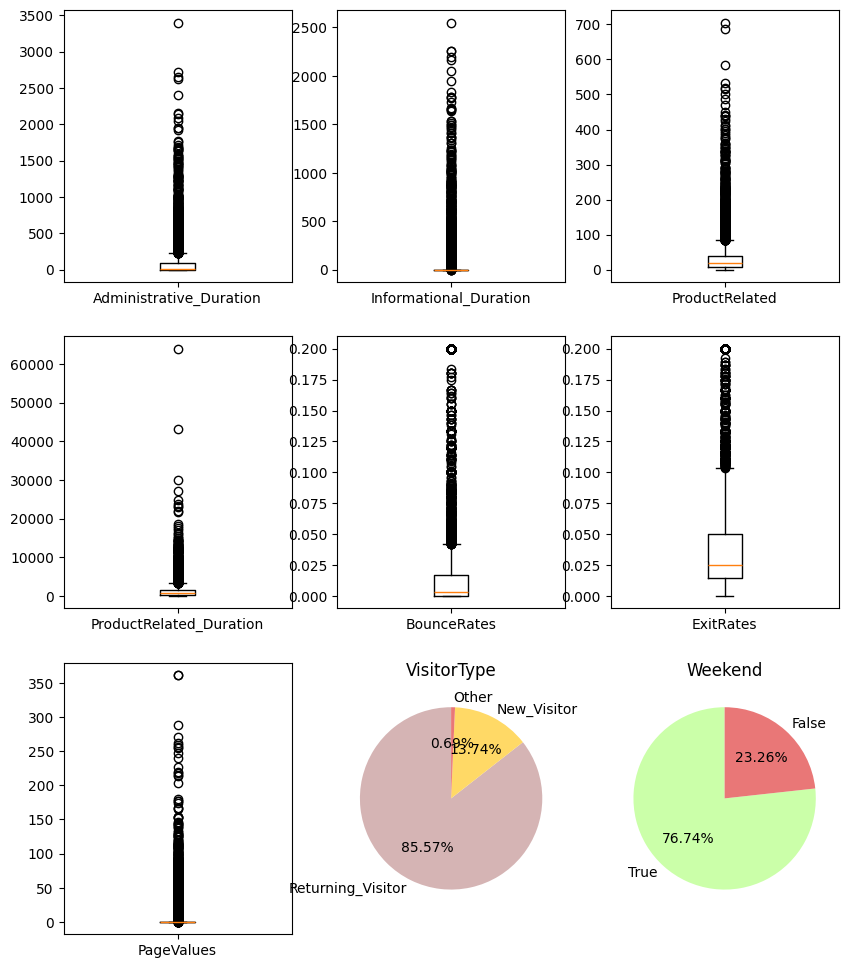

In [29]:
colors = ['#D5B4B4', '#FFD966', '#E97777']
fig, (
    (ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)
) = plt.subplots(3, 3, figsize=(10, 12))

ax1.boxplot(shop['Administrative_Duration'])
ax1.set_xticks([1], ['Administrative_Duration'])
ax2.boxplot(shop['Informational_Duration'])
ax2.set_xticks([1], ['Informational_Duration'])
ax3.boxplot(shop['ProductRelated'])
ax3.set_xticks([1], ['ProductRelated'])

ax4.boxplot(shop['ProductRelated_Duration'])
ax4.set_xticks([1], ['ProductRelated_Duration'])
ax5.boxplot(shop['BounceRates'])
ax5.set_xticks([1], ['BounceRates'])
ax6.boxplot(shop['ExitRates'])
ax6.set_xticks([1], ['ExitRates'])

ax7.boxplot(shop['PageValues'])
ax7.set_xticks([1], ['PageValues'])
ax8.set_title("VisitorType")
ax8.pie(shop['VisitorType'].value_counts(), labels=shop['VisitorType'].value_counts().index, autopct='%.2f%%', startangle=90, colors=colors)
ax9.set_title("Weekend")
ax9.pie(shop['Weekend'].value_counts(), labels=shop['Weekend'].value_counts().sort_values().index, autopct='%.2f%%', startangle=90, colors=['#CBFFA9', '#E97777'])

plt.show()

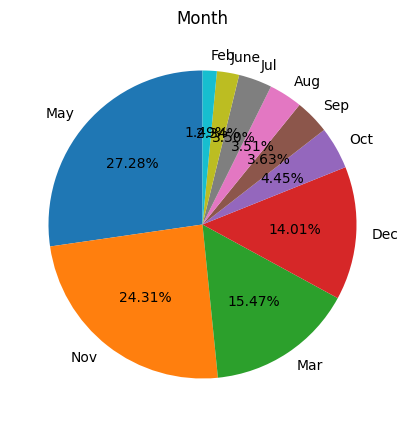

In [30]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.set_title("Month")
ax1.pie(shop['Month'].value_counts(), labels=shop['Month'].value_counts().index, autopct='%.2f%%', startangle=90)
plt.show()

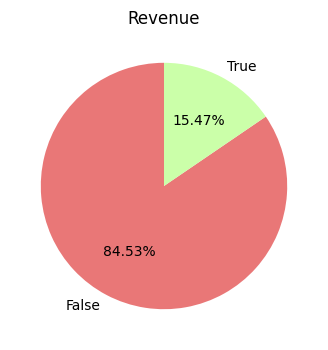

In [31]:
fig, ax1 = plt.subplots(1, 1, figsize=(10, 4))
ax1.set_title("Revenue")
ax1.pie(shop['Revenue'].value_counts(), labels=shop['Revenue'].value_counts().index, autopct='%.2f%%', startangle=90, colors=['#E97777','#CBFFA9'])
plt.show()

In [32]:
print('Revenue True : ', shop['Revenue'].value_counts()[True])
print('Revenue False : ', shop['Revenue'].value_counts()[False])

Revenue True :  1908
Revenue False :  10422


<hr>

#### 4. Data Preprocessing

**4.1 Outliers Handling**

In [33]:
# outliers
# x is low outliers if x < mean - (2.5 * std)
# x is high outliers if x > mean + (2.5 * std)

def getOutliersIndex(series):
    mean = series.mean()
    std = series.std()
    limitLow = mean - (2.5 * std)
    limitHigh = mean + (2.5 * std)
    return series[(series < limitLow) | (series > limitHigh)].index.to_list()

In [34]:
print(getOutliersIndex(shop['PageValues']))

[29, 198, 199, 200, 281, 295, 400, 457, 609, 637, 695, 806, 863, 903, 955, 1042, 1050, 1067, 1219, 1298, 1333, 1362, 1388, 1413, 1423, 1432, 1491, 1571, 1579, 1637, 1672, 1696, 1719, 1789, 1923, 1941, 1997, 2024, 2067, 2070, 2091, 2188, 2202, 2259, 2392, 2412, 2466, 2468, 2574, 2589, 2602, 2604, 2659, 2755, 2789, 2794, 2829, 2873, 2913, 2942, 2956, 3014, 3110, 3130, 3164, 3184, 3190, 3200, 3271, 3307, 3312, 3317, 3338, 3340, 3355, 3380, 3381, 3435, 3514, 3529, 3546, 3581, 3582, 3628, 3741, 3778, 3797, 3815, 3817, 3825, 3899, 3947, 4002, 4005, 4006, 4012, 4050, 4069, 4112, 4147, 4160, 4183, 4185, 4194, 4249, 4293, 4303, 4339, 4358, 4360, 4431, 4436, 4458, 4493, 4529, 4573, 4623, 4641, 4642, 4651, 4793, 4865, 4922, 4941, 4966, 4998, 5030, 5082, 5130, 5244, 5287, 5289, 5295, 5464, 5479, 5494, 5496, 5507, 5524, 5542, 5635, 5744, 5761, 5773, 5821, 5877, 5966, 5978, 6027, 6054, 6077, 6110, 6163, 6216, 6231, 6257, 6276, 6307, 6312, 6360, 6386, 6398, 6406, 6416, 6418, 6429, 6431, 6441, 6477, 6

In [35]:
# drop outliers
cols = [
    'Administrative_Duration', 'Informational_Duration', 'ProductRelated', 
    'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues'
]
for i in cols:
    shop = shop.drop(getOutliersIndex(shop[i]))
shop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9680 entries, 1 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9680 non-null   int64  
 1   Administrative_Duration  9680 non-null   float64
 2   Informational            9680 non-null   int64  
 3   Informational_Duration   9680 non-null   float64
 4   ProductRelated           9680 non-null   int64  
 5   ProductRelated_Duration  9680 non-null   float64
 6   BounceRates              9680 non-null   float64
 7   ExitRates                9680 non-null   float64
 8   PageValues               9680 non-null   float64
 9   SpecialDay               9680 non-null   float64
 10  Month                    9680 non-null   object 
 11  OperatingSystems         9680 non-null   int64  
 12  Browser                  9680 non-null   int64  
 13  Region                   9680 non-null   int64  
 14  TrafficType            

In [36]:
print('Revenue True : ', shop['Revenue'].value_counts()[True])
print('Revenue False : ', shop['Revenue'].value_counts()[False])

Revenue True :  1290
Revenue False :  8390


<hr>

**4.2 Normalisasi**

Normalisasi $\displaystyle x' = \frac {x - x_{min}} {x_{max} - x_{min}}$ 

Data ternormalisasi memiliki nilai antara 0 & 1

In [37]:
# functions normalisasi series/feature/columns
# series = pd.Series(np.array([1,2,3,4], name="X"))

def normalize(series):
    return (series - series.min())/(series.max() - series.min())

In [38]:
cols = [
    'Administrative_Duration', 'Informational_Duration', 'ProductRelated', 
    'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
    'Administrative', 'Informational', 'SpecialDay', 'OperatingSystems',
    'Browser', 'Region', 'TrafficType'
]
for i in cols:
    shop[i] = normalize(shop[i])
report(shop)

,Column,Type,Unique,n Unique,Null
0,Administrative,float64,"[0.0, 0.08695652173913043, 0.17391304347826086...",22,0
1,Administrative_Duration,float64,"[0.0, 0.10148396361895644, 0.12369554810914311...",2520,0
2,Informational,float64,"[0.0, 0.08333333333333333, 0.16666666666666666...",11,0
3,Informational_Duration,float64,"[0.0, 0.33317908372668403, 0.04442387783022453...",745,0
4,ProductRelated,float64,"[0.015503875968992248, 0.07751937984496124, 0....",130,0
5,ProductRelated_Duration,float64,"[0.01731496163742281, 0.16976778792941893, 0.0...",7944,0
6,BounceRates,float64,"[0.0, 0.18000000018, 0.14210526614210528, 0.16...",1228,0
7,ExitRates,float64,"[0.888888888888889, 0.4444444444444445, 0.2183...",3582,0
8,PageValues,float64,"[0.0, 0.9876827920225947, 0.3545151160058357, ...",1760,0
9,SpecialDay,float64,"[0.0, 0.8, 0.4, 1.0, 0.2, 0.6]",6,0


<hr>

**4.3 Labeling (label encoder)**

Label encoder pada binary features
- False = **0**
- True = **1**

In [39]:
shop = shop.replace([False], 0)
shop = shop.replace([True], 1)
report(shop)

,Column,Type,Unique,n Unique,Null
0,Administrative,float64,"[0.0, 0.08695652173913043, 0.17391304347826086...",22,0
1,Administrative_Duration,float64,"[0.0, 0.10148396361895644, 0.12369554810914311...",2520,0
2,Informational,float64,"[0.0, 0.08333333333333333, 0.16666666666666666...",11,0
3,Informational_Duration,float64,"[0.0, 0.33317908372668403, 0.04442387783022453...",745,0
4,ProductRelated,float64,"[0.015503875968992248, 0.07751937984496124, 0....",130,0
5,ProductRelated_Duration,float64,"[0.01731496163742281, 0.16976778792941893, 0.0...",7944,0
6,BounceRates,float64,"[0.0, 0.18000000018, 0.14210526614210528, 0.16...",1228,0
7,ExitRates,float64,"[0.888888888888889, 0.4444444444444445, 0.2183...",3582,0
8,PageValues,float64,"[0.0, 0.9876827920225947, 0.3545151160058357, ...",1760,0
9,SpecialDay,float64,"[0.0, 0.8, 0.4, 1.0, 0.2, 0.6]",6,0


In [40]:
shop['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

<hr>

Label encoder pada Month feature
- **'Feb'**: 2
- **'Mar'**: 3
- **'May'**: 5
- **'Oct'**: 10
- **'June'**: 6
- **'Jul'**: 7
- **'Aug'**: 8
- **'Nov'**: 11
- **'Sep'**: 9
- **'Dec'**: 12

In [41]:
shop = shop.replace(['Feb'], 2)
shop = shop.replace(['Mar'], 3)
shop = shop.replace(['May'], 5)
shop = shop.replace(['June'], 6)
shop = shop.replace(['Jul'], 7)
shop = shop.replace(['Aug'], 8)
shop = shop.replace(['Sep'], 9)
shop = shop.replace(['Oct'], 10)
shop = shop.replace(['Nov'], 11)
shop = shop.replace(['Dec'], 12)
report(shop)

,Column,Type,Unique,n Unique,Null
0,Administrative,float64,"[0.0, 0.08695652173913043, 0.17391304347826086...",22,0
1,Administrative_Duration,float64,"[0.0, 0.10148396361895644, 0.12369554810914311...",2520,0
2,Informational,float64,"[0.0, 0.08333333333333333, 0.16666666666666666...",11,0
3,Informational_Duration,float64,"[0.0, 0.33317908372668403, 0.04442387783022453...",745,0
4,ProductRelated,float64,"[0.015503875968992248, 0.07751937984496124, 0....",130,0
5,ProductRelated_Duration,float64,"[0.01731496163742281, 0.16976778792941893, 0.0...",7944,0
6,BounceRates,float64,"[0.0, 0.18000000018, 0.14210526614210528, 0.16...",1228,0
7,ExitRates,float64,"[0.888888888888889, 0.4444444444444445, 0.2183...",3582,0
8,PageValues,float64,"[0.0, 0.9876827920225947, 0.3545151160058357, ...",1760,0
9,SpecialDay,float64,"[0.0, 0.8, 0.4, 1.0, 0.2, 0.6]",6,0


<hr>

Label encoder pada VisitorType feature
- **'New_Visitor'**: 0
- **'Returning_Visitor'**: 1
- **'Other'**: 2

In [42]:
shop = shop.replace(['New_Visitor'], 0)
shop = shop.replace(['Returning_Visitor'], 1)
shop = shop.replace(['Other'], 2)
report(shop)

,Column,Type,Unique,n Unique,Null
0,Administrative,float64,"[0.0, 0.08695652173913043, 0.17391304347826086...",22,0
1,Administrative_Duration,float64,"[0.0, 0.10148396361895644, 0.12369554810914311...",2520,0
2,Informational,float64,"[0.0, 0.08333333333333333, 0.16666666666666666...",11,0
3,Informational_Duration,float64,"[0.0, 0.33317908372668403, 0.04442387783022453...",745,0
4,ProductRelated,float64,"[0.015503875968992248, 0.07751937984496124, 0....",130,0
5,ProductRelated_Duration,float64,"[0.01731496163742281, 0.16976778792941893, 0.0...",7944,0
6,BounceRates,float64,"[0.0, 0.18000000018, 0.14210526614210528, 0.16...",1228,0
7,ExitRates,float64,"[0.888888888888889, 0.4444444444444445, 0.2183...",3582,0
8,PageValues,float64,"[0.0, 0.9876827920225947, 0.3545151160058357, ...",1760,0
9,SpecialDay,float64,"[0.0, 0.8, 0.4, 1.0, 0.2, 0.6]",6,0


<hr>

**4.4 Handle Imbalanced Dataset**

- Oversampling/Upsampling is suitable when you don’t have a lots of observations in your dataset (<10K observations).
- Undersampling/Downsampling is suitable when you don’t have a lots of observations in your dataset (>10K observations).

In [43]:
print('Revenue Yes : ', shop['Revenue'].value_counts()[1])
print('Revenue No : ', shop['Revenue'].value_counts()[0])

Revenue Yes :  1290
Revenue No :  8390


In [46]:
shop_minor = shop[shop['Revenue'] == 1]
shop_major = shop[shop['Revenue'] == 0]

# Upsample minority class
shop_minor_upsampled = resample(
    shop_minor, 
    replace=True,
    n_samples=len(shop_major),
    random_state=1234
)

# Combine minor & major as a dataframe
shop_upsampled = pd.concat([shop_major, shop_minor_upsampled])
print('Revenue Yes : ', shop_upsampled['Revenue'].value_counts()[1])
print('Revenue No : ', shop_upsampled['Revenue'].value_counts()[0])

Revenue Yes :  8390
Revenue No :  8390


<hr>

**4.5 Feature Separation**

In [63]:
# Separate feature predictors (x) & target (y)

x = shop_upsampled.drop(['Revenue'], axis=1)
print(x.columns)
print(x.iloc[0])

y = shop_upsampled['Revenue']
print(y.name)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')
Administrative             0.000000
Administrative_Duration    0.000000
Informational              0.000000
Informational_Duration     0.000000
ProductRelated             0.015504
ProductRelated_Duration    0.017315
BounceRates                0.000000
ExitRates                  0.888889
PageValues                 0.000000
SpecialDay                 0.000000
Month                      2.000000
OperatingSystems           0.142857
Browser                    0.083333
Region                     0.000000
TrafficType                0.052632
VisitorType                1.000000
Weekend                    0.000000
Name: 1, dtype: float64
Revenue


<hr>

**4.6 Correlation (Pearson)**

In [64]:
shop_upsampled.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Administrative,1.000000,0.737162,0.279624,0.233721,0.333856,0.264660,-0.108085,-0.256890,0.082125,-0.104128,0.061199,-0.000577,-0.027874,-0.005277,-0.012347,0.004291,0.026081,0.157432
Administrative_Duration,0.737162,1.000000,0.236925,0.217528,0.232785,0.235454,-0.083813,-0.227929,0.082911,-0.102556,0.054178,-0.007851,-0.025608,0.006098,-0.008240,-0.010888,0.034364,0.136089
Informational,0.279624,0.236925,1.000000,0.743185,0.256300,0.238225,-0.022925,-0.107558,0.025857,-0.038768,0.000691,-0.005960,-0.032509,-0.013713,0.005034,0.067144,0.015830,0.105609
Informational_Duration,0.233721,0.217528,0.743185,1.000000,0.208713,0.210334,-0.017503,-0.100389,0.048970,-0.022372,-0.022913,-0.011694,-0.032553,0.000273,-0.006495,0.051969,0.019366,0.114926
ProductRelated,0.333856,0.232785,0.256300,0.208713,1.000000,0.779242,-0.085953,-0.325964,0.035785,-0.011638,0.117461,0.020164,0.000597,-0.039733,-0.011274,0.170124,-0.005539,0.168903
ProductRelated_Duration,0.264660,0.235454,0.238225,0.210334,0.779242,1.000000,-0.081284,-0.288000,0.081030,-0.020963,0.095103,0.019677,0.003941,-0.012844,-0.018339,0.157549,-0.003857,0.191725
BounceRates,-0.108085,-0.083813,-0.022925,-0.017503,-0.085953,-0.081284,1.000000,0.620236,-0.171293,0.127661,-0.018756,0.045623,-0.034680,-0.017376,0.070244,0.198318,-0.040402,-0.178183
ExitRates,-0.256890,-0.227929,-0.107558,-0.100389,-0.325964,-0.288000,0.620236,1.000000,-0.287884,0.123695,-0.053407,0.009854,0.000245,-0.005997,0.049277,0.239069,-0.059428,-0.294554
PageValues,0.082125,0.082911,0.025857,0.048970,0.035785,0.081030,-0.171293,-0.287884,1.000000,-0.058886,0.000486,-0.012266,0.016699,-0.014883,-0.002407,-0.131249,-0.006933,0.564685
SpecialDay,-0.104128,-0.102556,-0.038768,-0.022372,-0.011638,-0.020963,0.127661,0.123695,-0.058886,1.000000,-0.251513,0.013948,0.013413,-0.004910,0.023386,0.064287,-0.015826,-0.103615


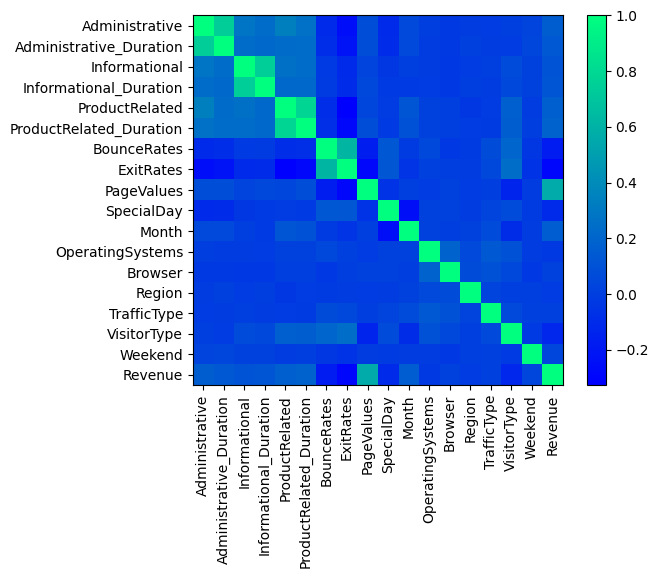

In [49]:
# Correlation in heatmap
plt.imshow(shop_upsampled.corr(), cmap='winter')
plt.xticks(np.arange(len(shop_upsampled.corr().columns)), shop_upsampled.corr().columns, rotation=90)
plt.yticks(np.arange(len(shop_upsampled.corr().columns)), shop_upsampled.corr().columns)
plt.colorbar()
plt.show()

<hr>

#### 5. Classification Models

**5.1 Split Datasets: Test & Training**

Sklearn default: test **25%** & training **75%**

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x.to_numpy(),y)
print(len(x_train))
print(len(x_test))
print(len(x_train) + len(x_test))

12585
4195
16780


<hr>

**5.2 Logistic Regression**

In [66]:
modelA = LogisticRegression(solver='liblinear')
modelA.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [67]:
y_predictA = modelA.predict(x_test)
y_predictA

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [68]:
y_test.to_numpy()

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [70]:
# dataframe x_test, y_test & y_predict
# bandingkan y_test & y_predict

dfA = pd.DataFrame(x_test, columns=[
    'Administrative', 'Administrative_Duration', 'Informational',
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
    'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
    'Weekend'
])
dfA = dfA.join(pd.Series(y_test.to_numpy(), name="Revenue Real"))
dfA = dfA.join(pd.Series(y_predictA, name="Revenue Prediction"))
dfA

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue Real,Revenue Prediction
0,0.086957,0.089995,0.000000,0.000000,0.325581,0.413498,0.000000,0.042328,0.322604,1.0,5.0,0.000000,0.000000,0.000,0.157895,0.0,1.0,1,1
1,0.260870,0.190725,0.000000,0.000000,0.643411,0.699529,0.000000,0.067722,0.125262,0.0,3.0,0.142857,0.083333,0.125,0.052632,1.0,0.0,1,1
2,0.260870,0.603479,0.083333,0.236002,0.077519,0.108978,0.128571,0.126984,0.000000,0.0,12.0,0.285714,0.083333,0.125,0.052632,0.0,0.0,1,0
3,0.130435,0.047391,0.000000,0.000000,0.015504,0.020223,0.000000,0.197531,0.000000,0.0,11.0,0.142857,0.083333,0.250,0.052632,0.0,0.0,1,0
4,0.000000,0.000000,0.000000,0.000000,0.255814,0.382097,0.109091,0.459708,0.000000,0.0,11.0,0.142857,0.333333,0.250,0.000000,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4190,0.000000,0.000000,0.000000,0.000000,0.333333,0.385578,0.041860,0.062016,0.000000,0.8,5.0,0.142857,0.416667,0.000,0.000000,1.0,0.0,0,0
4191,0.000000,0.000000,0.000000,0.000000,0.015504,0.009199,0.000000,0.888889,0.000000,0.0,5.0,0.142857,0.083333,0.000,0.157895,1.0,1.0,0,0
4192,0.217391,0.196968,0.000000,0.000000,0.093023,0.059412,0.000000,0.313725,0.000000,0.0,10.0,0.142857,0.083333,0.625,1.000000,1.0,0.0,0,0
4193,0.086957,0.158162,0.000000,0.000000,0.077519,0.095232,0.000000,0.068376,0.495721,0.0,9.0,0.142857,0.083333,0.000,0.052632,0.0,1.0,1,1


In [71]:
# logistic regression feature importances
importance = modelA.coef_[0]
importance

array([ 0.62531063, -0.15661339,  0.9170342 ,  0.61017258,  0.76223343,
        0.5265498 , -0.73735116, -0.76415727,  8.77651741, -0.38098014,
        0.13820837, -0.35010065,  0.23983122, -0.06399666,  0.13706728,
       -0.43944927,  0.22811234])

In [72]:
# Confusion Matrix

cmA = confusion_matrix(dfA['Revenue Real'], dfA['Revenue Prediction'], labels=modelA.classes_)
dfcmA = pd.DataFrame(
    cmA, columns=['Pred NO', 'Pred YES'], index=['Actual NO', 'Actual YES']
)
dfcmA

,Pred NO,Pred YES
Actual NO,1886,205
Actual YES,582,1522


<Figure size 1000x300 with 0 Axes>

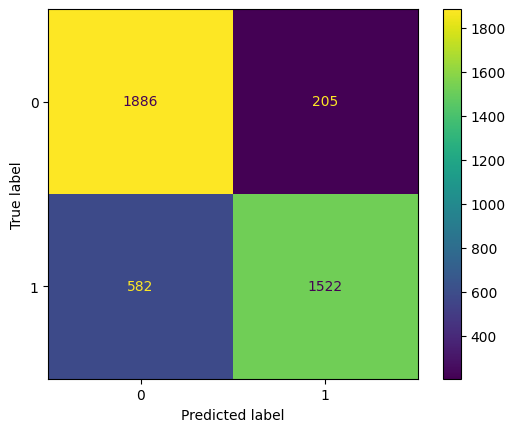

In [73]:
plt.figure(figsize=(10,3))
disp = ConfusionMatrixDisplay(confusion_matrix=cmA, display_labels=modelA.classes_)
disp.plot()
plt.show()

In [74]:
# Evaluation Matrix

print('✅ Accuracy =', accuracy_score(dfA['Revenue Real'], dfA['Revenue Prediction']))
print('✅ Error Rate =', 1 - accuracy_score(dfA['Revenue Real'], dfA['Revenue Prediction']))
print('✅ Recall(+) =', recall_score(dfA['Revenue Real'], dfA['Revenue Prediction'], pos_label=1)) # TP Rate / Recall Positif
print('✅ Recall(-) =', recall_score(dfA['Revenue Real'], dfA['Revenue Prediction'], pos_label=0))  # TN Rate / Recall Negatif
print('✅ Precision(+) =', precision_score(dfA['Revenue Real'], dfA['Revenue Prediction'], pos_label=1)) # Precision positif
print('✅ Precision(-) =', precision_score(dfA['Revenue Real'], dfA['Revenue Prediction'], pos_label=0))  # Precision Negatif
print('✅ F1 Score(+) =', f1_score(dfA['Revenue Real'], dfA['Revenue Prediction'], pos_label=1))
print('✅ F1 Score(-) =', f1_score(dfA['Revenue Real'], dfA['Revenue Prediction'], pos_label=0))
print('✅ Balanced Accuracy =', balanced_accuracy_score(dfA['Revenue Real'], dfA['Revenue Prediction']))

✅ Accuracy = 0.8123957091775924
✅ Error Rate = 0.1876042908224076
✅ Recall(+) = 0.723384030418251
✅ Recall(-) = 0.9019607843137255
✅ Precision(+) = 0.8812970469021424
✅ Precision(-) = 0.7641815235008104
✅ F1 Score(+) = 0.7945706081962933
✅ F1 Score(-) = 0.8273744242158368
✅ Balanced Accuracy = 0.8126724073659882


<hr>

**5.3 Decision Tree**

In [75]:
modelB = tree.DecisionTreeClassifier()
modelB.fit(x_train, y_train)

DecisionTreeClassifier()

In [76]:
y_predictB = modelB.predict(x_test)
y_predictB

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [77]:
y_test.to_numpy()

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [84]:
# dataframe x_test, y_test & y_predict
# bandingkan y_test & y_predict

dfB = pd.DataFrame(x_test, columns=[
    'Administrative', 'Administrative_Duration', 'Informational',
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
    'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
    'Weekend'
])
dfB = dfB.join(pd.Series(y_test.to_numpy(), name="Revenue Real"))
dfB = dfB.join(pd.Series(y_predictB, name="Revenue Prediction"))
dfB

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue Real,Revenue Prediction
0,0.086957,0.089995,0.000000,0.000000,0.325581,0.413498,0.000000,0.042328,0.322604,1.0,5.0,0.000000,0.000000,0.000,0.157895,0.0,1.0,1,1
1,0.260870,0.190725,0.000000,0.000000,0.643411,0.699529,0.000000,0.067722,0.125262,0.0,3.0,0.142857,0.083333,0.125,0.052632,1.0,0.0,1,1
2,0.260870,0.603479,0.083333,0.236002,0.077519,0.108978,0.128571,0.126984,0.000000,0.0,12.0,0.285714,0.083333,0.125,0.052632,0.0,0.0,1,1
3,0.130435,0.047391,0.000000,0.000000,0.015504,0.020223,0.000000,0.197531,0.000000,0.0,11.0,0.142857,0.083333,0.250,0.052632,0.0,0.0,1,1
4,0.000000,0.000000,0.000000,0.000000,0.255814,0.382097,0.109091,0.459708,0.000000,0.0,11.0,0.142857,0.333333,0.250,0.000000,1.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4190,0.000000,0.000000,0.000000,0.000000,0.333333,0.385578,0.041860,0.062016,0.000000,0.8,5.0,0.142857,0.416667,0.000,0.000000,1.0,0.0,0,0
4191,0.000000,0.000000,0.000000,0.000000,0.015504,0.009199,0.000000,0.888889,0.000000,0.0,5.0,0.142857,0.083333,0.000,0.157895,1.0,1.0,0,0
4192,0.217391,0.196968,0.000000,0.000000,0.093023,0.059412,0.000000,0.313725,0.000000,0.0,10.0,0.142857,0.083333,0.625,1.000000,1.0,0.0,0,0
4193,0.086957,0.158162,0.000000,0.000000,0.077519,0.095232,0.000000,0.068376,0.495721,0.0,9.0,0.142857,0.083333,0.000,0.052632,0.0,1.0,1,1


In [85]:
# decision tree feature importance
importance = modelB.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.02103
Feature: 1, Score: 0.05353
Feature: 2, Score: 0.00900
Feature: 3, Score: 0.01811
Feature: 4, Score: 0.04242
Feature: 5, Score: 0.06650
Feature: 6, Score: 0.03036
Feature: 7, Score: 0.07404
Feature: 8, Score: 0.49400
Feature: 9, Score: 0.00201
Feature: 10, Score: 0.08400
Feature: 11, Score: 0.01230
Feature: 12, Score: 0.01115
Feature: 13, Score: 0.02775
Feature: 14, Score: 0.03836
Feature: 15, Score: 0.00664
Feature: 16, Score: 0.00881


In [86]:
# Confusion Matrix

cmB = confusion_matrix(dfB['Revenue Real'], dfB['Revenue Prediction'], labels=modelB.classes_)
dfcmB = pd.DataFrame(
    cmB, columns=['Pred NO', 'Pred YES'], index=['Actual NO', 'Actual YES']
)
dfcmB

,Pred NO,Pred YES
Actual NO,1907,184
Actual YES,10,2094


<Figure size 1000x300 with 0 Axes>

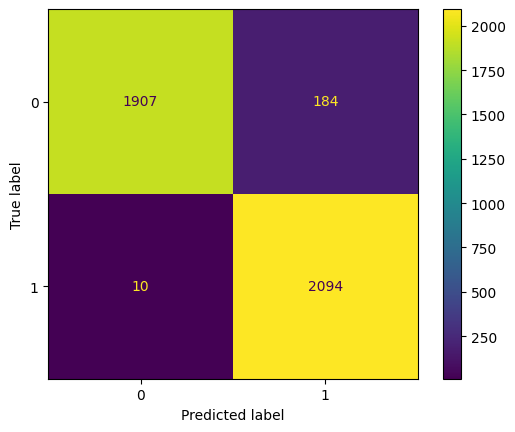

In [87]:
plt.figure(figsize=(10,3))
disp = ConfusionMatrixDisplay(confusion_matrix=cmB, display_labels=modelB.classes_)
disp.plot()
plt.show()

In [88]:
# Evaluation Matrix

print('✅ Accuracy =', accuracy_score(dfB['Revenue Real'], dfB['Revenue Prediction']))
print('✅ Error Rate =', 1 - accuracy_score(dfB['Revenue Real'], dfB['Revenue Prediction']))
print('✅ Recall(+) =', recall_score(dfB['Revenue Real'], dfB['Revenue Prediction'], pos_label=1)) # TP Rate / Recall Positif
print('✅ Recall(-) =', recall_score(dfB['Revenue Real'], dfB['Revenue Prediction'], pos_label=0))  # TN Rate / Recall Negatif
print('✅ Precision(+) =', precision_score(dfB['Revenue Real'], dfB['Revenue Prediction'], pos_label=1)) # Precision positif
print('✅ Precision(-) =', precision_score(dfB['Revenue Real'], dfB['Revenue Prediction'], pos_label=0))  # Precision Negatif
print('✅ F1 Score(+) =', f1_score(dfB['Revenue Real'], dfB['Revenue Prediction'], pos_label=1))
print('✅ F1 Score(-) =', f1_score(dfB['Revenue Real'], dfB['Revenue Prediction'], pos_label=0))
print('✅ Balanced Accuracy =', balanced_accuracy_score(dfB['Revenue Real'], dfB['Revenue Prediction']))

✅ Accuracy = 0.9537544696066746
✅ Error Rate = 0.04624553039332535
✅ Recall(+) = 0.9952471482889734
✅ Recall(-) = 0.9120038259206121
✅ Precision(+) = 0.9192273924495171
✅ Precision(-) = 0.9947835159102765
✅ F1 Score(+) = 0.9557279780921953
✅ F1 Score(-) = 0.9515968063872255
✅ Balanced Accuracy = 0.9536254871047928


<hr>

**5.4 K-Nearest Neighbors**

In [89]:
modelC = KNeighborsClassifier()
modelC.fit(x_train, y_train)

KNeighborsClassifier()

In [90]:
y_predictC = modelC.predict(x_test)
y_predictC

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [91]:
y_test.to_numpy()

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [92]:
# dataframe x_test, y_test & y_predict
# bandingkan y_test & y_predict

dfC = pd.DataFrame(x_test, columns=[
    'Administrative', 'Administrative_Duration', 'Informational',
    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
    'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
    'Weekend'
])
dfC = dfC.join(pd.Series(y_test.to_numpy(), name="Revenue Real"))
dfC = dfC.join(pd.Series(y_predictC, name="Revenue Prediction"))
dfC

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue Real,Revenue Prediction
0,0.086957,0.089995,0.000000,0.000000,0.325581,0.413498,0.000000,0.042328,0.322604,1.0,5.0,0.000000,0.000000,0.000,0.157895,0.0,1.0,1,1
1,0.260870,0.190725,0.000000,0.000000,0.643411,0.699529,0.000000,0.067722,0.125262,0.0,3.0,0.142857,0.083333,0.125,0.052632,1.0,0.0,1,1
2,0.260870,0.603479,0.083333,0.236002,0.077519,0.108978,0.128571,0.126984,0.000000,0.0,12.0,0.285714,0.083333,0.125,0.052632,0.0,0.0,1,1
3,0.130435,0.047391,0.000000,0.000000,0.015504,0.020223,0.000000,0.197531,0.000000,0.0,11.0,0.142857,0.083333,0.250,0.052632,0.0,0.0,1,1
4,0.000000,0.000000,0.000000,0.000000,0.255814,0.382097,0.109091,0.459708,0.000000,0.0,11.0,0.142857,0.333333,0.250,0.000000,1.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4190,0.000000,0.000000,0.000000,0.000000,0.333333,0.385578,0.041860,0.062016,0.000000,0.8,5.0,0.142857,0.416667,0.000,0.000000,1.0,0.0,0,1
4191,0.000000,0.000000,0.000000,0.000000,0.015504,0.009199,0.000000,0.888889,0.000000,0.0,5.0,0.142857,0.083333,0.000,0.157895,1.0,1.0,0,0
4192,0.217391,0.196968,0.000000,0.000000,0.093023,0.059412,0.000000,0.313725,0.000000,0.0,10.0,0.142857,0.083333,0.625,1.000000,1.0,0.0,0,0
4193,0.086957,0.158162,0.000000,0.000000,0.077519,0.095232,0.000000,0.068376,0.495721,0.0,9.0,0.142857,0.083333,0.000,0.052632,0.0,1.0,1,1


In [93]:
# Confusion Matrix

cmC = confusion_matrix(dfC['Revenue Real'], dfC['Revenue Prediction'], labels=modelC.classes_)
dfcmC = pd.DataFrame(
    cmC, columns=['Pred NO', 'Pred YES'], index=['Actual NO', 'Actual YES']
)
dfcmC

,Pred NO,Pred YES
Actual NO,1693,398
Actual YES,84,2020


<Figure size 1000x300 with 0 Axes>

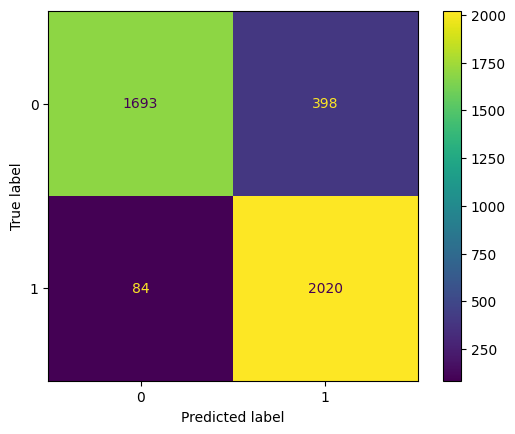

In [94]:
plt.figure(figsize=(10,3))
disp = ConfusionMatrixDisplay(confusion_matrix=cmC, display_labels=modelC.classes_)
disp.plot()
plt.show()

In [95]:
# Evaluation Matrix

print('✅ Accuracy =', accuracy_score(dfC['Revenue Real'], dfC['Revenue Prediction']))
print('✅ Error Rate =', 1 - accuracy_score(dfC['Revenue Real'], dfC['Revenue Prediction']))
print('✅ Recall(+) =', recall_score(dfC['Revenue Real'], dfC['Revenue Prediction'], pos_label=1)) # TP Rate / Recall Positif
print('✅ Recall(-) =', recall_score(dfC['Revenue Real'], dfC['Revenue Prediction'], pos_label=0))  # TN Rate / Recall Negatif
print('✅ Precision(+) =', precision_score(dfC['Revenue Real'], dfC['Revenue Prediction'], pos_label=1)) # Precision positif
print('✅ Precision(-) =', precision_score(dfC['Revenue Real'], dfC['Revenue Prediction'], pos_label=0))  # Precision Negatif
print('✅ F1 Score(+) =', f1_score(dfC['Revenue Real'], dfC['Revenue Prediction'], pos_label=1))
print('✅ F1 Score(-) =', f1_score(dfC['Revenue Real'], dfC['Revenue Prediction'], pos_label=0))
print('✅ Balanced Accuracy =', balanced_accuracy_score(dfC['Revenue Real'], dfC['Revenue Prediction']))

✅ Accuracy = 0.8851013110846245
✅ Error Rate = 0.11489868891537547
✅ Recall(+) = 0.9600760456273765
✅ Recall(-) = 0.809660449545672
✅ Precision(+) = 0.8354011579818031
✅ Precision(-) = 0.9527293190770962
✅ F1 Score(+) = 0.8934099955771782
✅ F1 Score(-) = 0.8753877973112719
✅ Balanced Accuracy = 0.8848682475865242
